In [1]:
#Various models required
import numpy as np
import pandas as pd
import operator
import os,sys
from sklearn import model_selection
import re,string

In [2]:
#This are stop_words in common taken from intenet.
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [3]:
#X is a list further made in form of tuple , where first element is name of document and second is the text in documents.
#Y is the category
X  =[] 
Y = []
for category in os.listdir("C:/Users/Arnav/mini_newsgroups/"):
    for document in os.listdir("C:/Users/Arnav/mini_newsgroups/"+category):
        with open("C:/Users/Arnav/mini_newsgroups/"+category+'/'+document, "r") as f:
            X.append((document,f.read()))
            Y.append(category)

In [4]:
#DataType of X and Y in detail
print(type(X))
print(type(X[0]))
print(type(X[0][0]))
print(type(X[0][1]))
print(type(Y))
#We can see it is a tuple with first element as name of document and second text of document.
print(X[0])

<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'str'>
<class 'list'>
('51121', 'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51121 soc.motss:139944 rec.scouting:5318\nNewsgroups: alt.atheism,soc.motss,rec.scouting\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!fs7.ece.cmu.edu!europa.eng.gtefsd.com!howland.reston.ans.net!wupost!uunet!newsgate.watson.ibm.com!yktnews.watson.ibm.com!watson!Watson.Ibm.Com!strom\nFrom: strom@Watson.Ibm.Com (Rob Strom)\nSubject: Re: [soc.motss, et al.] "Princeton axes matching funds for Boy Scouts"\nSender: @watson.ibm.com\nMessage-ID: <1993Apr05.180116.43346@watson.ibm.com>\nDate: Mon, 05 Apr 93 18:01:16 GMT\nDistribution: usa\nReferences: <C47EFs.3q47@austin.ibm.com> <1993Mar22.033150.17345@cbnewsl.cb.att.com> <N4HY.93Apr5120934@harder.ccr-p.ida.org>\nOrganization: IBM Research\nLines: 15\n\nIn article <N4HY.93Apr5120934@harder.ccr-p.ida.org>, n4hy@harder.ccr-p.ida.org (Bob McGwier) writes:\n\n|> [1] HOWEVER, I hate economic terrorism and pol

In [5]:
#splitting the data in training and testing
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y)

In [6]:
#split has done in nearly 3:1 ratio
print(len(x_train))
print(len(x_test))

1500
500


In [7]:
#Demonstrating re.split
sample_text="Hey! whatsupp. I am fine. Whatchu you doing there?"
print(re.split(r'\W+',sample_text))

['Hey', 'whatsupp', 'I', 'am', 'fine', 'Whatchu', 'you', 'doing', 'there', '']


In [8]:
#Making Dictionary of words with their corresponding frequency
dic={}
for i in range(len(x_train)):
    #Took [1] because [0] is name of doc and [1] is text in doc
    word=x_train[i][1].lower()
    #splitting the text into words
    stripped=re.split(r'\W+',word)
    #Iterating over each word
    for s in stripped:
        #we will not include stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 in our dictionary
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        if s in dic:
            dic[s]+=1
        else:
            dic[s]=1
dic

{'path': 1520,
 'cantaloupe': 1971,
 'srv': 2425,
 'cmu': 3942,
 'edu': 12370,
 'crabapple': 454,
 'ece': 380,
 'europa': 373,
 'eng': 506,
 'gtefsd': 373,
 'com': 3850,
 'howland': 829,
 'reston': 827,
 'ans': 838,
 'net': 1937,
 'usc': 202,
 'utexas': 296,
 'tamsun': 13,
 'tamu': 31,
 'enterpoop': 29,
 'mit': 183,
 'lab': 56,
 'not': 2606,
 'mail': 300,
 'clinton': 134,
 'org': 325,
 'gore': 8,
 'newsgroups': 1530,
 'talk': 872,
 'politics': 547,
 'misc': 882,
 'subject': 1625,
 'president': 173,
 'trip': 11,
 'pittsburg': 2,
 'date': 1577,
 'apr': 1567,
 'organization': 1504,
 'project': 74,
 'gnu': 10,
 'free': 171,
 'software': 260,
 'foundation': 15,
 'mass': 48,
 'ave': 9,
 'cambridge': 29,
 'usa': 258,
 'lines': 1593,
 'sender': 844,
 'daemon': 10,
 'message': 1636,
 'life': 144,
 'nntp': 671,
 'posting': 710,
 'host': 641,
 'white': 86,
 'house': 85,
 'office': 54,
 'press': 80,
 'secretary': 23,
 'immediate': 18,
 'release': 47,
 'april': 116,
 'statement': 55,
 'will': 1146,

In [9]:
#Sorting the dictionary on basis of frequency of words in descending order
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_dic

[('edu', 12370),
 ('cmu', 3942),
 ('com', 3850),
 ('news', 2632),
 ('not', 2606),
 ('srv', 2425),
 ('cantaloupe', 1971),
 ('net', 1937),
 ('message', 1636),
 ('subject', 1625),
 ('lines', 1593),
 ('date', 1577),
 ('can', 1575),
 ('apr', 1567),
 ('newsgroups', 1530),
 ('path', 1520),
 ('organization', 1504),
 ('state', 1422),
 ('gmt', 1354),
 ('ohio', 1208),
 ('one', 1181),
 ('will', 1146),
 ('writes', 1098),
 ('comp', 1049),
 ('article', 1020),
 ('references', 957),
 ('misc', 882),
 ('talk', 872),
 ('sender', 844),
 ('ans', 838),
 ('howland', 829),
 ('reston', 827),
 ('don', 774),
 ('people', 763),
 ('like', 736),
 ('know', 735),
 ('just', 731),
 ('university', 727),
 ('sci', 722),
 ('posting', 710),
 ('mps', 694),
 ('nntp', 671),
 ('usenet', 661),
 ('host', 641),
 ('zaphod', 619),
 ('may', 618),
 ('get', 613),
 ('alt', 612),
 ('think', 612),
 ('also', 602),
 ('windows', 560),
 ('politics', 547),
 ('new', 544),
 ('use', 539),
 ('time', 531),
 ('harvard', 525),
 ('near', 514),
 ('rutger

In [10]:
import matplotlib.pyplot as plt


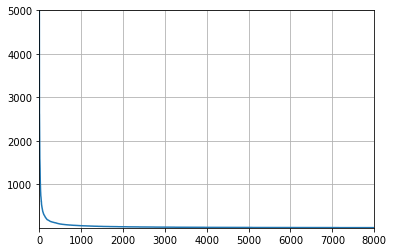

In [11]:
#Plotting graph on no. of words vs frequency 
#On basis of graph we can decide the number of features we want to take
features=sorted_dic
answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()   


In [12]:
#We decided to take top 2000 words with max freuqency as our feature
#here feature list is answer1
answer1=[features[i][0] for i in range(2000)]
answer1

['edu',
 'cmu',
 'com',
 'news',
 'not',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'can',
 'apr',
 'newsgroups',
 'path',
 'organization',
 'state',
 'gmt',
 'ohio',
 'one',
 'will',
 'writes',
 'comp',
 'article',
 'references',
 'misc',
 'talk',
 'sender',
 'ans',
 'howland',
 'reston',
 'don',
 'people',
 'like',
 'know',
 'just',
 'university',
 'sci',
 'posting',
 'mps',
 'nntp',
 'usenet',
 'host',
 'zaphod',
 'may',
 'get',
 'alt',
 'think',
 'also',
 'windows',
 'politics',
 'new',
 'use',
 'time',
 'harvard',
 'near',
 'rutgers',
 'system',
 'eng',
 'noc',
 'see',
 'xref',
 'sei',
 'rec',
 'well',
 'das',
 'crabapple',
 'good',
 'even',
 'two',
 'cis',
 'soc',
 'uunet',
 'say',
 'now',
 'way',
 'make',
 'world',
 'many',
 'space',
 'ece',
 'europa',
 'gtefsd',
 'gov',
 'much',
 'religion',
 'first',
 'christian',
 'rochester',
 'club',
 'used',
 'distribution',
 'ibm',
 'want',
 'god',
 'image',
 'uiuc',
 'magnesium',
 'udel',
 'org',
 'anyone'

In [13]:
#Making x_train dataset
#No. of rows is equivalent to rows in x_train, and column is equal to length of answer1(feature list)
x_train_dataset=np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_train_dataset[i][answer1.index(j)]+=1

In [14]:
#Making x_test dataset
#No. of rows is equivalent to rows in x_test, and column is equal to length of answer1(feature list)
x_test_dataset=np.zeros([len(x_test),len(answer1)],int)
for i in range(len(x_test)):
    words=x_test[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_test_dataset[i][answer1.index(j)]+=1

In [15]:
#printing x_train and x_test dataset 
print(x_train_dataset)
print("--------------------------")
print(x_test_dataset)

[[ 9  3  1 ...  0  0  0]
 [16  3  2 ...  0  0  0]
 [ 7  2  0 ...  0  0  0]
 ...
 [12  5  5 ...  0  0  0]
 [ 3  3  4 ...  0  0  0]
 [10  1  0 ...  0  0  0]]
--------------------------
[[ 6  4  1 ...  0  0  0]
 [ 6  3  2 ...  0  0  0]
 [ 5  2  0 ...  0  0  0]
 ...
 [10  2  2 ...  0  0  0]
 [ 5  3  2 ...  0  0  0]
 [ 8  5  9 ...  0  0  0]]


# SK-LEARN'S IMPLEMENTATION OF NAIVE BAYES

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [17]:
#Demonstrating confusion-matrix and classification report
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_pred=clf.predict(x_test_dataset)
print("Score on training data:",clf.score(x_train_dataset,y_train))
print("Score on testing data:",clf.score(x_test_dataset,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Score on training data: 0.956
Score on testing data: 0.792
[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  7]
 [ 0 10  7  1  0  1  0  0  0  0  0  0  4  0  0  0  0  0  0  0]
 [ 0  1 17  1  0  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 19  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 19  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  1  0 14  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0 21  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  1 21  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2 22  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0 24  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  1 25  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  0  0  0 25  0  1  0  0  1  0  0  0]
 [ 0  0  0  0  1  0  3  1  0  0  0  0 25  1  2  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0 20  0  0  0  0  1  1]
 [ 0  0  1  0  1  1  0  0  0  1  0  0  4  0 12  0  0  0  0 

# Self Implementation of Naive Baye's

In [18]:
#Making dictionary for implementing Naive Baye's
def fit(x_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over answer1(actual feature list)
        for feature in answer1:
            #Calculating total word in feature
            l=(x_train_with_i[:,answer1.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count


In [19]:
def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob
    

In [20]:
#Best_class or probable answer will be returned from here
def predict_for_single(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [21]:
def predict_(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [22]:
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [23]:
#This cell will take time to execute
dictionary=fit(x_train_dataset,y_train)
y_pred=predict_(x_test_dataset,dictionary)


In [24]:
dictionary

{'total_doc': 1500,
 'misc.forsale': {'edu': 648,
  'cmu': 194,
  'com': 95,
  'news': 123,
  'not': 24,
  'srv': 122,
  'cantaloupe': 103,
  'net': 103,
  'message': 83,
  'subject': 79,
  'lines': 77,
  'date': 77,
  'can': 25,
  'apr': 80,
  'newsgroups': 77,
  'path': 77,
  'organization': 76,
  'state': 81,
  'gmt': 69,
  'ohio': 75,
  'one': 29,
  'will': 20,
  'writes': 9,
  'comp': 13,
  'article': 13,
  'references': 11,
  'misc': 173,
  'talk': 0,
  'sender': 46,
  'ans': 44,
  'howland': 43,
  'reston': 43,
  'don': 10,
  'people': 6,
  'like': 20,
  'know': 7,
  'just': 19,
  'university': 38,
  'sci': 9,
  'posting': 40,
  'mps': 34,
  'nntp': 34,
  'usenet': 43,
  'host': 34,
  'zaphod': 30,
  'may': 6,
  'get': 8,
  'alt': 2,
  'think': 5,
  'also': 11,
  'windows': 7,
  'politics': 0,
  'new': 41,
  'use': 8,
  'time': 8,
  'harvard': 28,
  'near': 24,
  'rutgers': 7,
  'system': 22,
  'eng': 29,
  'noc': 30,
  'see': 7,
  'xref': 26,
  'sei': 23,
  'rec': 26,
  'well':

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pandas as pd

In [28]:
print("Score on testing_data:",score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Score on testing_data: 0.784
[[17  0  0  0  0  0  0  1  0  0  0  0  0  0  0  3  0  0  1  4]
 [ 0  9  9  1  0  1  0  0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0 18  1  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 18  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  6 16  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  2  2  1  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 22  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  1 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 25  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0 26  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  0  0  0 27  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  2  0  2  0  0  0 27  2  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  3  0  1  0  1 18  0  0  0  0  1  0]
 [ 0  0  0  0  0  1  1  0  0  0  0  0  6  0 11  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0 

In [29]:
#It can be seen that Sk learns implementation and self implementation show similar results :)